In [1]:
!pip install pandas numpy matplotlib seaborn wordcloud nltk scikit-learn xgboost catboost lightgbm optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.3 MB/s eta 0:00:00


In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Importing Libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import optuna
import pickle
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# **Data Ingestion**

In [8]:
df = pd.read_csv('completeSpamAssassin.csv')

# **Pre-Processing**

In [9]:
df.dropna(inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['no_char'] = df['Body'].apply(len)
df['no_words'] = df['Body'].apply(lambda x: len(nltk.word_tokenize(x)))
df['no_sent'] = df['Body'].apply(lambda x: len(nltk.sent_tokenize(x)))
def text_preprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    stemmer = SnowballStemmer('english')
    for i in text:
        y.append(stemmer.stem(i))
    return " ".join(y)
df['clean_text'] = df['Body'].apply(text_preprocessing)

# **Word Cloud**

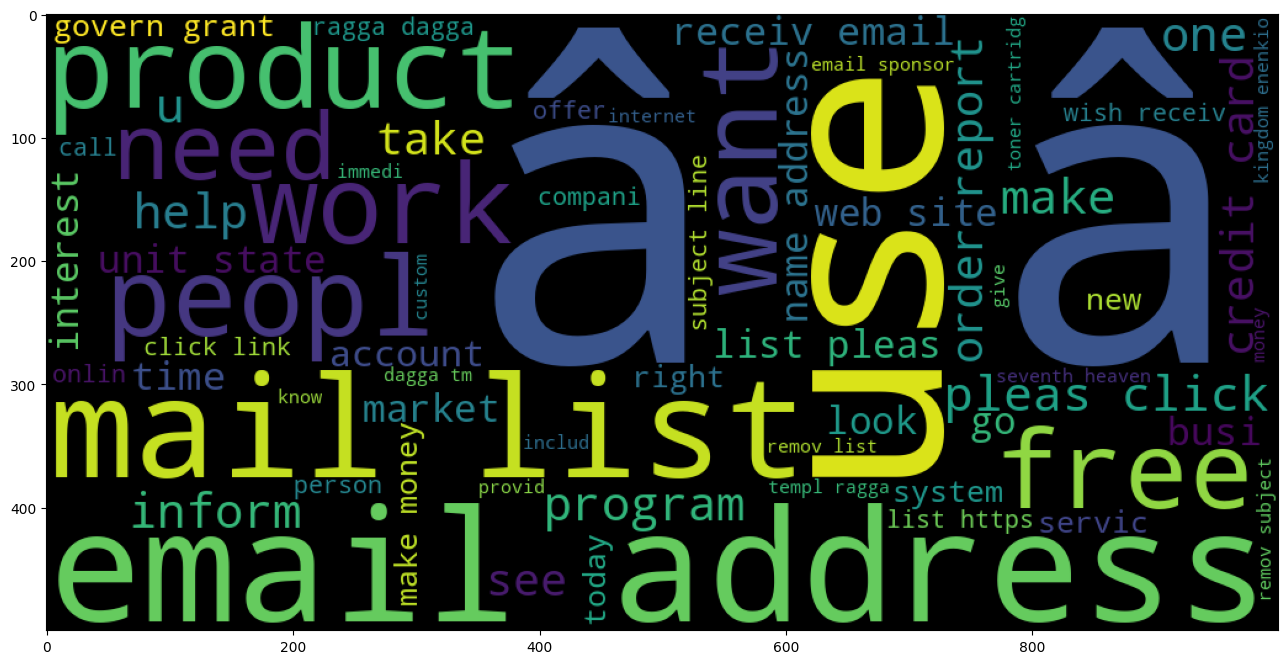

In [10]:
wc = WordCloud(width=1000, height=500, min_font_size=10, background_color='black')
spam_wc = wc.generate(df[df['Label'] == 1]['clean_text'].str.cat(sep=' '))
plt.figure(figsize=(20, 8))
plt.imshow(spam_wc)

# **Word Corpus**

In [11]:
spam_corpus = [word for mail in df[df['Label'] == 1]['clean_text'].tolist() for word in mail.split()]
ham_corpus = [word for mail in df[df['Label'] == 0]['clean_text'].tolist() for word in mail.split()]

# **TF-IDF Vectorizer**

In [12]:
tfidf = TfidfVectorizer(max_features=17000)
x = tfidf.fit_transform(df['clean_text']).toarray()
y = df['Label'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# **Classifiers**

In [13]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
abc = AdaBoostClassifier(n_estimators=50, random_state=0)
bc = BaggingClassifier(n_estimators=50, random_state=0)
etc = ExtraTreesClassifier(n_estimators=50, random_state=0)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=0)
xgb = XGBClassifier(n_estimators=50, random_state=0)
sgd = SGDClassifier(random_state=0)
cat = CatBoostClassifier(verbose=0, random_state=0)
lgbm = LGBMClassifier(random_state=0)
classifiers = {
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB': bnb,
    'SVC': svc,
    'KNeighbors': knc,
    'DecisionTree': dtc,
    'LogisticRegression': lrc,
    'RandomForest': rfc,
    'AdaBoost': abc,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'GradientBoosting': gbdt,
    'XGB': xgb,
    'SGD': sgd,
    'Catboost': cat,
    'LGBM': lgbm
}

# **Model Training**

In [14]:
accuracy_scores = []
precision_scores = []

for name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print("For ", name)
    print("Accuracy - ", accuracy)
    print("Precision - ", precision, '\n')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

For  GaussianNB
Accuracy -  0.9098428453267163
Precision -  0.8406169665809768 

For  MultinomialNB
Accuracy -  0.9371381306865177
Precision -  0.8983957219251337 

For  BernoulliNB
Accuracy -  0.9412737799834574
Precision -  0.9779179810725552 

For  SVC
Accuracy -  0.9578163771712159
Precision -  0.9007444168734491 

For  KNeighbors
Accuracy -  0.3978494623655914
Precision -  0.3393829401088929 

For  DecisionTree
Accuracy -  0.8734491315136477
Precision -  0.7701711491442543 

For  LogisticRegression
Accuracy -  0.9346567411083541
Precision -  0.8851174934725848 

For  RandomForest
Accuracy -  0.9404466501240695
Precision -  0.8775 

For  AdaBoost
Accuracy -  0.9288668320926385
Precision -  0.8478260869565217 

For  BaggingClassifier
Accuracy -  0.9346567411083541
Precision -  0.8624078624078624 

For  ExtraTreesClassifier
Accuracy -  0.9454094292803971
Precision -  0.8869346733668342 

For  GradientBoosting
Accuracy -  0.9214226633581473
Precision -  0.876010781671159 

For  XGB
Ac

# **Performance Evaluation**

In [15]:
performance = pd.DataFrame({'Algorithm': classifiers.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)
print(performance)

               Algorithm  Accuracy  Precision
2            BernoulliNB  0.941274   0.977918
13                   SGD  0.960298   0.903465
3                    SVC  0.957816   0.900744
1          MultinomialNB  0.937138   0.898396
14              Catboost  0.944582   0.890585
10  ExtraTreesClassifier  0.945409   0.886935
6     LogisticRegression  0.934657   0.885117
12                   XGB  0.943755   0.882500
15                  LGBM  0.943755   0.878713
7           RandomForest  0.940447   0.877500
11      GradientBoosting  0.921423   0.876011
9      BaggingClassifier  0.934657   0.862408
8               AdaBoost  0.928867   0.847826
0             GaussianNB  0.909843   0.840617
5           DecisionTree  0.873449   0.770171
4             KNeighbors  0.397849   0.339383


# **Hyperparameter Tuning**



In [16]:
def objective_bnb(trial):
    alpha = trial.suggest_categorical('alpha', [0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3])
    binarize = trial.suggest_categorical('binarize', [0.0, 0.1, 0.2, 0.3])

    bnb = BernoulliNB(
        alpha=alpha,
        binarize=binarize
    )
    return cross_val_score(bnb, x_train, y_train, n_jobs=-1, verbose=0, scoring='precision').mean()
study_bnb = optuna.create_study(direction='maximize')
study_bnb.optimize(objective_bnb, n_trials=10)
trial_bnb = study_bnb.best_trial
print('Accuracy: {}'.format(trial_bnb.value))
print("Best hyperparameters for the AI algorithm BernoulliNB: {}".format(trial_bnb.params))
bnb = BernoulliNB(alpha=trial_bnb.params['alpha'], binarize=trial_bnb.params['binarize'])
bnb.fit(x_train, y_train)
bnb_pred = bnb.predict(x_test)
print('Accuracy :', accuracy_score(y_test, bnb_pred))
print('Precision :', precision_score(y_test, bnb_pred))

[I 2023-12-07 06:31:11,609] A new study created in memory with name: no-name-7b233e72-3008-451d-8748-b8be9107b957
[I 2023-12-07 06:31:20,006] Trial 0 finished with value: 0.9166516555975834 and parameters: {'alpha': 0.7, 'binarize': 0.0}. Best is trial 0 with value: 0.9166516555975834.
[I 2023-12-07 06:31:24,700] Trial 1 finished with value: 0.9430263433645113 and parameters: {'alpha': 0.8, 'binarize': 0.0}. Best is trial 1 with value: 0.9430263433645113.
[I 2023-12-07 06:31:29,966] Trial 2 finished with value: 0.9475286057628619 and parameters: {'alpha': 0.7, 'binarize': 0.1}. Best is trial 2 with value: 0.9475286057628619.
[I 2023-12-07 06:31:34,665] Trial 3 finished with value: 0.9475286057628619 and parameters: {'alpha': 0.7, 'binarize': 0.1}. Best is trial 2 with value: 0.9475286057628619.
[I 2023-12-07 06:31:39,307] Trial 4 finished with value: 1.0 and parameters: {'alpha': 0.9, 'binarize': 0.3}. Best is trial 4 with value: 1.0.
[I 2023-12-07 06:31:48,728] Trial 5 finished with v

Accuracy: 1.0
Best hyperparameters for the AI algorithm BernoulliNB: {'alpha': 0.9, 'binarize': 0.3}
Accuracy : 0.7270471464019851
Precision : 1.0


### **Model Selected : BernoulliNB**
### **Initial Accuracy : 97.79 %**
### **Accuracy : 100 % ( after hypertuning )**

We selected the best performing model : BernoulliNB. Then we went for hyperparameter tuning of the model to get best hyperparameters and the accuracy recorded was 1.0 that indicates around 100% accuracy. Initially it was 97.79 %. There is a considerable improvement in the accuracy after using hypertuning technique.